### Decoy Effect

This notebook aims to recreate some findings concerning the **Decoy Effect**. Specifically, we recreate the event described in https://thestrategystory.com/2020/10/02/economist-magazine-a-story-of-clever-decoy-pricing/ with numbers taken from https://en.wikipedia.org/wiki/Decoy_effect.

As of right now, the LLM does not know about the Decoy Effect and mostly chooses the answer option which comes with the most features. One certain aspect to be researched might be the determination of a threshold after which A becomes the dominant option. Although this threshold would not really hold any informative meaning. 
When priming the model as a market researcher and mentioning the Decoy Effect, some distribution amongst the answers can be observed. However, the degree to which the answers change once the decoy product is removed does not resemble the previous empirical findings. 

In [1]:
from openai import OpenAI
import openai
import matplotlib.pyplot as plt
import os 
import numpy as np
import pandas as pd

In [2]:
# Get API key (previously saved as environmental variable)
openai.api_key = os.environ["OPENAI_API_KEY"]

# Set client
client = OpenAI()

# Set global plot style
plt.style.use('ggplot')

|Answer option          | Scenario 1 | Scenario 2 (no 2nd option)|
|-----------------------|--------------|-----------|
| Online subscription   |     16%      |  68%       |
| Print subscribtion    |      0%     | 0%        |
| Combination           |     84%   | 32%        |

(empirical findings)

In [242]:
answers = []
for _ in range(100): 
    response = client.chat.completions.create(
        model = "gpt-4-1106-preview", # model = "gpt-3.5-turbo", "gpt-4", "gpt-4-1106-preview"
        max_tokens = 1,
        temperature = 1, # range is 0 to 2
        messages = [
        {"role": "user", "content": """You are presented with three different subsciption alternatives for the "The Economist" magazine:
         A: 1-year Economist.com subscription for $59.00, including access to all articles from 1997 onwards.
         B: 1-year Print subscription to The Economist for $125.00.
         C: Print & web subscription for 125$: 1-year subscription to the print edition of The Econnomist and online access to all articles from 1997 onwards.
         Which alternative would you choose? Please answer by only giving the letter of the alternative you would choose without any reasoning. 
         Answer: I would choose option 
         """},
                   ])

    # Store the answer in the list
    answer = response.choices[0].message.content
    answers.append(answer.strip())

In [243]:
# Collecting results without priming
A = answers.count("A")
B = answers.count("B")
C = answers.count("C")

# Getting percentage of answers
p_a_1 = f"{(A / len(answers)) * 100:.2f}%"
p_b_1 = f"{(B / len(answers)) * 100:.2f}%"
p_c_1 = f"{(C / len(answers)) * 100:.2f}%"

plt.style.use('classic')

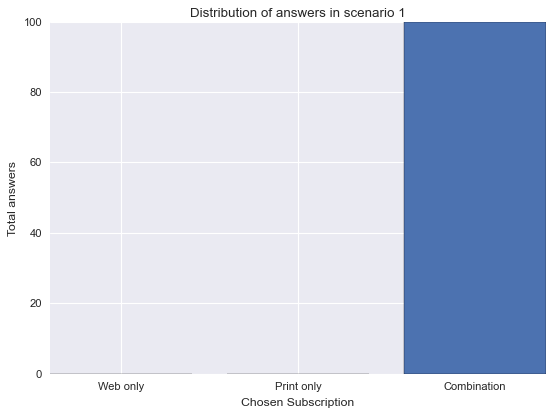

In [263]:
# Set labels
labels = ['Web only', 'Print only', 'Combination']

# Create a bar graph
plt.bar(labels, [A, B, C])

# Add labels and a title
plt.xlabel('Chosen Subscription')
plt.ylabel('Total answers')
plt.title('Distribution of answers in scenario 1')


# Show the plot
plt.show()

### Removing the second (decoy) option

In [245]:
answers_2 = []
for _ in range(100): 
    response = client.chat.completions.create(
        model = "gpt-4-1106-preview", # model = "gpt-3.5-turbo", "gpt-4", "gpt-4-1106-preview"
        max_tokens = 1,
        temperature = 1, # range is 0 to 2
        messages = [
        {"role": "user", "content": """You are presented with three different subsciption alternatives for the "The Economist" magazine:
         A: 1-year Economist.com subscription for $59.00, including access to all articles from 1997 onwards.
         B: 1-year Print subscription to The Economist for $125.00.
         C: Print & web subscription for 125$: 1-year subscription to the print edition of The Econnomist and online access to all articles from 1997 onwards.
         The Marketing team of The Economist however has now decided to remove option B. 
         Which remaining alternative would you choose? Please answer by only giving the letter of the alternative you would choose.
         """},
                   ])

    # Store the answer in the list
    answer = response.choices[0].message.content
    answers_2.append(answer.strip())
    

In [246]:
# Collecting results without priming
A_2 = answers_2.count("A")
B_2 = answers_2.count("B")
C_2 = answers_2.count("C")

# Getting percentage of answers
p_a_2 = f"{(A_2 / len(answers)) * 100:.2f}%"
p_b_2 = f"{(B_2 / len(answers)) * 100:.2f}%"
p_c_2 = f"{(C_2 / len(answers)) * 100:.2f}%"

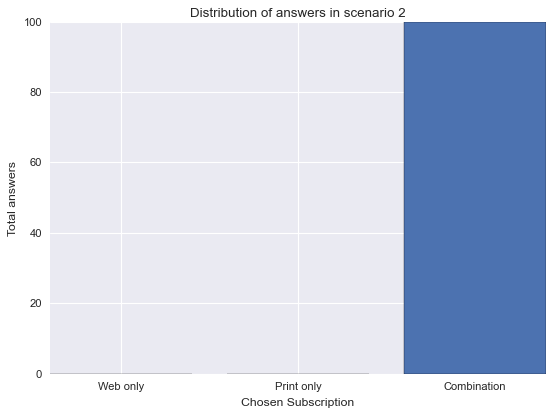

In [264]:
# Set labels
labels = ['Web only', 'Print only', 'Combination']

# Create a bar graph
plt.bar(labels, [A_2, B_2, C_2])

# Add labels and a title
plt.xlabel('Chosen Subscription')
plt.ylabel('Total answers')
plt.title('Distribution of answers in scenario 2')

# Show the plot
plt.show()

In [248]:
df = pd.DataFrame([
    ["Online subscription", p_a_1, p_a_2],
    ["Print subscription", p_b_1, p_b_2],
    ["Combination", p_c_1, p_c_2]
], columns=["Answer option", "Scenario 1", "Scenario 2 (no 2nd option)"])

df

,Answer option,Scenario 1,Scenario 2 (no 2nd option)
0,Online subscription,0.00%,0.00%
1,Print subscription,0.00%,0.00%
2,Combination,100.00%,100.00%


- Repeating scenario 1 priming the model as a market researcher 

In [249]:
answers_1_mr = []
for _ in range(100): 
    response = client.chat.completions.create(
        model = "gpt-4-1106-preview", # model = "gpt-3.5-turbo", "gpt-4", "gpt-4-1106-preview"
        max_tokens = 1,
        temperature = 1,
        messages = [
        {"role": "user", "content": """You are a market researcher that knows about the Decoy Effect. 
         You are presented with three different subsciption alternatives for the "The Economist" magazine:
         A: 1-year Economist.com subscription for $59.00, including access to all articles from 1997 onwards.
         B: 1-year Print subscription to The Economist for $125.00.
         C: Print & web subscription for 125$: 1-year subscription to the print edition of The Econnomist and online access to all articles from 1997 onwards.
         Which alternative would you choose? Please answer by only giving the letter of the alternative you would choose.
         """},
                   ])

    # Store the answer in the list
    answer = response.choices[0].message.content
    answers_1_mr.append(answer.strip())
    

In [250]:
# Collecting results without priming
A_1_mr = answers_1_mr.count("A")
B_1_mr = answers_1_mr.count("B")
C_1_mr = answers_1_mr.count("C")

# Getting percentage of answers
p_a_1_mr = f"{(A_1_mr / len(answers)) * 100:.2f}%"
p_b_1_mr = f"{(B_1_mr / len(answers)) * 100:.2f}%"
p_c_1_mr = f"{(C_1_mr / len(answers)) * 100:.2f}%"

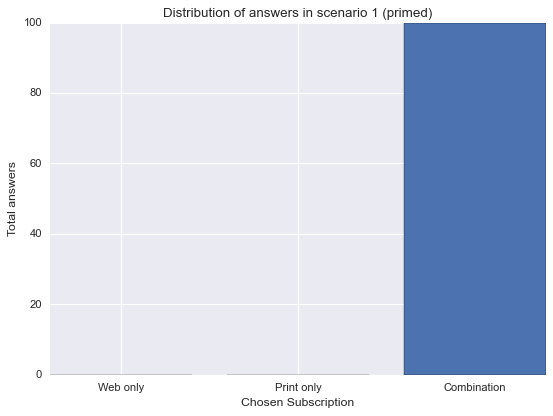

In [265]:
# Set labels
labels = ['Web only', 'Print only', 'Combination']

# Create a bar graph
plt.bar(labels, [A_1_mr, B_1_mr, C_1_mr])

# Add labels and a title
plt.xlabel('Chosen Subscription')
plt.ylabel('Total answers')
plt.title('Distribution of answers in scenario 1 (primed)')

# Show the plot
plt.show()

- Repeating scenario 2 priming the model as a market researcher

In [252]:
answers_2_mr = []
for _ in range(100): 
    response = client.chat.completions.create(
        model = "gpt-4-1106-preview", # model = "gpt-3.5-turbo", "gpt-4", "gpt-4-1106-preview"
        max_tokens = 1,
        temperature = 1,
        messages = [
        {"role": "user", "content": """You are a market researcher that knows about the Decoy Effect. 
         You are presented with three different subsciption alternatives for the "The Economist" magazine:
         A: 1-year Economist.com subscription for $59.00, including access to all articles from 1997 onwards.
         B: 1-year Print subscription to The Economist for $125.00.
         C: Print & web subscription for 125$: 1-year subscription to the print edition of The Econnomist and online access to all articles from 1997 onwards.
        The Marketing team of The Economist however has now decided to remove option B. 
         Which alternative would you choose? Please answer by only giving the letter of the alternative you would choose.
         """},
                   ])

    # Store the answer in the list
    answer = response.choices[0].message.content
    answers_2_mr.append(answer.strip())
    

In [253]:
# Collecting results without priming
A_2_mr = answers_2_mr.count("A")
B_2_mr = answers_2_mr.count("B")
C_2_mr = answers_2_mr.count("C")

# Getting percentage of answers
p_a_2_mr = f"{(A_2_mr / len(answers)) * 100:.2f}%"
p_b_2_mr = f"{(B_2_mr / len(answers)) * 100:.2f}%"
p_c_2_mr = f"{(C_2_mr / len(answers)) * 100:.2f}%"

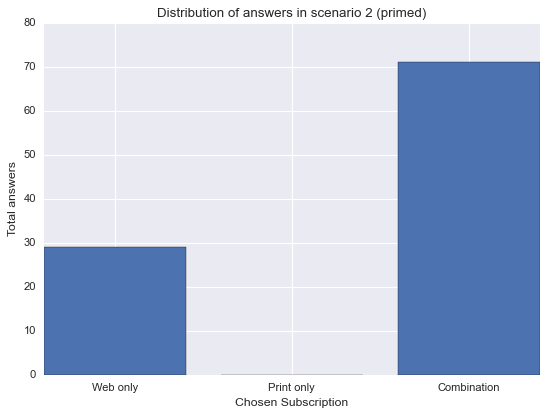

In [266]:
# Set labels
labels = ['Web only', 'Print only', 'Combination']

# Create a bar graph
plt.bar(labels, [A_2_mr, B_2_mr, C_2_mr])

# Add labels and a title
plt.xlabel('Chosen Subscription')
plt.ylabel('Total answers')
plt.title('Distribution of answers in scenario 2 (primed)')

# Show the plot
plt.show()

In [255]:
df_mr = pd.DataFrame([
    ["Online subscription", p_a_1_mr, p_a_2_mr],
    ["Print subscription", p_b_1_mr, p_b_2_mr],
    ["Combination", p_c_1_mr, p_c_2_mr]
], columns=["Answer option", "Scenario 1", "Scenario 2 (no 2nd option)"])

df_mr

,Answer option,Scenario 1,Scenario 2 (no 2nd option)
0,Online subscription,0.00%,29.00%
1,Print subscription,0.00%,0.00%
2,Combination,100.00%,71.00%


For some runs I did get results that actually resembled the empirical results of the underlying incident. Generally, re-running this specific prompt: Market researcher and decoy removed tends to give results that differ in the extent to which subscribers switch to option A. We always observe a considerable switch, but the actual numbers differ significantly from run to run. 

-----------------------------------------------

### Trying different models 

- GPT-3.5-turbo

In [11]:
answers = []
for _ in range(10): 
    response = client.chat.completions.create(
        model = "gpt-3.5-turbo", # model = "gpt-3.5-turbo", "gpt-4", "gpt-4-1106-preview"
        max_tokens = 1,
        temperature = 1, # range is 0 to 2
        messages = [
        {"role": "user", "content": """You are presented with three different subsciption alternatives for the "The Economist" magazine:
         A: 1-year Economist.com subscription for $59.00, including access to all articles from 1997 onwards.
         B: 1-year Print subscription to The Economist for $125.00.
         C: Print & web subscription for 125$: 1-year subscription to the print edition of The Econnomist and online access to all articles from 1997 onwards.
         Which alternative would you choose? Please answer by only giving the letter of the alternative you would choose without any reasoning. 
         """},
                   ])

    # Store the answer in the list
    answer = response.choices[0].message.content
    answers.append(answer.strip())

In [12]:
# Collecting results without priming
A = answers.count("A")
B = answers.count("B")
C = answers.count("C")

# Getting percentage of answers
p_a_1 = f"{(A / len(answers)) * 100:.2f}%"
p_b_1 = f"{(B / len(answers)) * 100:.2f}%"
p_c_1 = f"{(C / len(answers)) * 100:.2f}%"

plt.style.use('classic')

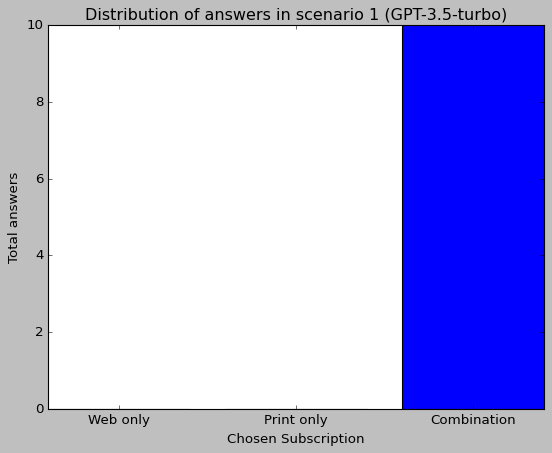

In [14]:
# Set labels
labels = ['Web only', 'Print only', 'Combination']

# Create a bar graph
plt.bar(labels, [A, B, C])

# Add labels and a title
plt.xlabel('Chosen Subscription')
plt.ylabel('Total answers')
plt.title('Distribution of answers in scenario 1 (GPT-3.5-turbo)')


# Show the plot
plt.show()

- Removing decoy option 

In [3]:
answers_2 = []
for _ in range(10): 
    response = client.chat.completions.create(
        model = "gpt-3.5-turbo", # model = "gpt-3.5-turbo", "gpt-4", "gpt-4-1106-preview"
        max_tokens = 1,
        temperature = 1, # range is 0 to 2
        messages = [
        {"role": "user", "content": """You are presented with three different subsciption alternatives for the "The Economist" magazine:
         A: 1-year Economist.com subscription for $59.00, including access to all articles from 1997 onwards.
         B: 1-year Print subscription to The Economist for $125.00.
         C: Print & web subscription for 125$: 1-year subscription to the print edition of The Econnomist and online access to all articles from 1997 onwards.
         The Marketing team of The Economist however has now decided to remove option B. 
         Which remaining alternative would you choose? Please answer by only giving the letter of the alternative you would choose. 
         Answer: I would choose option 
         """},
                   ])

    # Store the answer in the list
    answer = response.choices[0].message.content
    answers_2.append(answer.strip())
    

In [6]:
# Collecting results without priming
A_2 = answers_2.count("A")
B_2 = answers_2.count("B")
C_2 = answers_2.count("C")

# Getting percentage of answers
p_a_2 = f"{(A_2 / len(answers_2)) * 100:.2f}%"
p_b_2 = f"{(B_2 / len(answers_2)) * 100:.2f}%"
p_c_2 = f"{(C_2 / len(answers_2)) * 100:.2f}%"

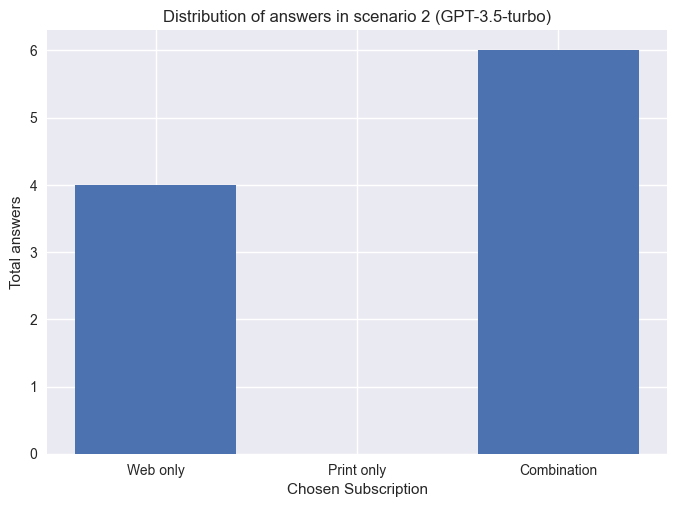

In [7]:
# Set labels
labels = ['Web only', 'Print only', 'Combination']

# Create a bar graph
plt.bar(labels, [A_2, B_2, C_2])

# Add labels and a title
plt.xlabel('Chosen Subscription')
plt.ylabel('Total answers')
plt.title('Distribution of answers in scenario 2 (GPT-3.5-turbo)')

# Show the plot
plt.show()

- Priming as market researcher 

In [8]:
answers_1_mr = []
for _ in range(10): 
    response = client.chat.completions.create(
        model = "gpt-3.5-turbo", # model = "gpt-3.5-turbo", "gpt-4", "gpt-4-1106-preview"
        max_tokens = 1,
        temperature = 1,
        messages = [
        {"role": "user", "content": """You are a market researcher that knows about the Decoy Effect. 
         You are presented with three different subsciption alternatives for the "The Economist" magazine:
         A: 1-year Economist.com subscription for $59.00, including access to all articles from 1997 onwards.
         B: 1-year Print subscription to The Economist for $125.00.
         C: Print & web subscription for 125$: 1-year subscription to the print edition of The Econnomist and online access to all articles from 1997 onwards.
         Which alternative would you choose? Please answer by only giving the letter of the alternative you would choose.
         Answer: I would choose option
         """},
                   ])

    # Store the answer in the list
    answer = response.choices[0].message.content
    answers_1_mr.append(answer.strip())
    

In [9]:
# Collecting results without priming
A_1_mr = answers_1_mr.count("A")
B_1_mr = answers_1_mr.count("B")
C_1_mr = answers_1_mr.count("C")

# Getting percentage of answers
p_a_1_mr = f"{(A_1_mr / len(answers_1_mr)) * 100:.2f}%"
p_b_1_mr = f"{(B_1_mr / len(answers_1_mr)) * 100:.2f}%"
p_c_1_mr = f"{(C_1_mr / len(answers_1_mr)) * 100:.2f}%"

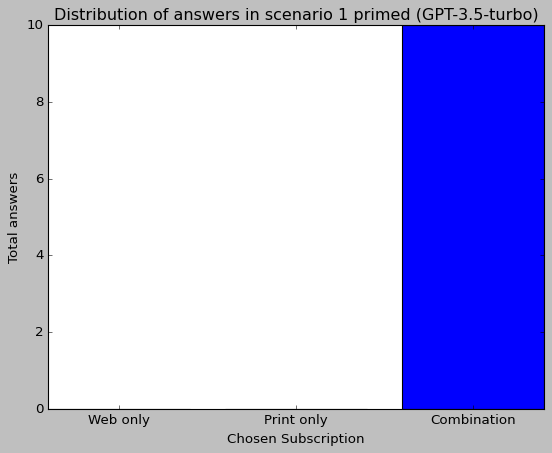

In [19]:
# Set labels
labels = ['Web only', 'Print only', 'Combination']

# Create a bar graph
plt.bar(labels, [A_1_mr, B_1_mr, C_1_mr])

# Add labels and a title
plt.xlabel('Chosen Subscription')
plt.ylabel('Total answers')
plt.title('Distribution of answers in scenario 1 primed (GPT-3.5-turbo)')

# Show the plot
plt.show()

- Removing decoy option 

In [15]:
answers_2_mr = []
for _ in range(10): 
    response = client.chat.completions.create(
        model = "gpt-3.5-turbo", # model = "gpt-3.5-turbo", "gpt-4", "gpt-4-1106-preview"
        max_tokens = 1,
        temperature = 1,
        messages = [
        {"role": "user", "content": """You are a market researcher that knows about the Decoy effect.
         You are presented with three different subsciption alternatives for the "The Economist" magazine:
         A: 1-year Economist.com subscription for $59.00, including access to all articles from 1997 onwards.
         B: 1-year Print subscription to The Economist for $125.00.
         C: Print & web subscription for 125$: 1-year subscription to the print edition of The Econnomist and online access to all articles from 1997 onwards.
         The Marketing team of The Economist however has now decided to remove option B. 
         Which remaining alternative would you choose? Please answer by only giving the letter of the alternative you would choose. 
         Answer: I would choose option 
         """},
                   ])

    # Store the answer in the list
    answer = response.choices[0].message.content
    answers_2_mr.append(answer.strip())
    

In [16]:
# Collecting results without priming
A_2_mr = answers_2_mr.count("A")
B_2_mr = answers_2_mr.count("B")
C_2_mr = answers_2_mr.count("C")

# Getting percentage of answers
p_a_2_mr = f"{(A_2_mr / len(answers_2_mr)) * 100:.2f}%"
p_b_2_mr = f"{(B_2_mr / len(answers_2_mr)) * 100:.2f}%"
p_c_2_mr = f"{(C_2_mr / len(answers_2_mr)) * 100:.2f}%"

In [17]:
answers_2_mr

['A', 'C', 'C', 'C', 'C', 'C', 'A', 'C', 'C', 'C']

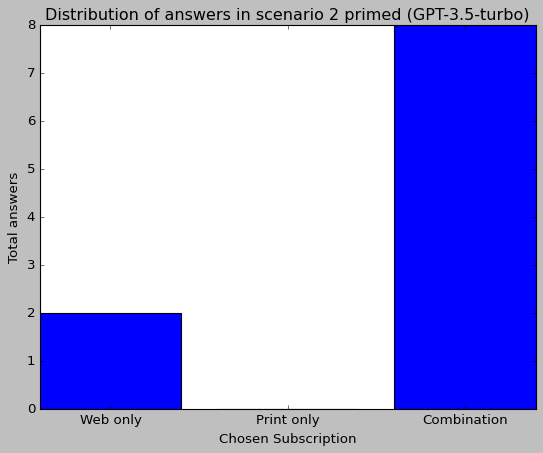

In [20]:
# Set labels
labels = ['Web only', 'Print only', 'Combination']

# Create a bar graph
plt.bar(labels, [A_2_mr, B_2_mr, C_2_mr])

# Add labels and a title
plt.xlabel('Chosen Subscription')
plt.ylabel('Total answers')
plt.title('Distribution of answers in scenario 2 primed (GPT-3.5-turbo)')

# Show the plot
plt.show()

### Playing around with completions to get logprobs

In [15]:
prompt = """You are a market researcher that knows about the Decoy Effect. 
         You are presented with three different subsciption alternatives for the "The Economist" magazine:
         A: 1-year Economist.com subscription for $59.00, including access to all articles from 1997 onwards.
         B: 1-year Print subscription to The Economist for $125.00.
         C: Print & web subscription for 125$: 1-year subscription to the print edition of The Econnomist and online access to all articles from 1997 onwards.
         The Marketing team of The Economist however has now decided to remove option B. 
         Which remaining alternative would you choose? Please answer by only giving the letter of the alternative you would choose: A, B or C.
         
         I choose option: """

response = client.completions.create(
      model="gpt-3.5-turbo-instruct",
      prompt=prompt,
      temperature=1,
      max_tokens=1,
      logprobs=3
    )

In [16]:
response.choices[0].logprobs.top_logprobs[0]

{'A': -1.6728693, 'C': -0.65751326, '\n': -1.9152113}

In [17]:
p_a = np.exp(response.choices[0].logprobs.top_logprobs[0]['A'])
p_a

0.18770770250067828

In [18]:
p_c = np.exp(response.choices[0].logprobs.top_logprobs[0]['C'])
p_c

0.5181382087769574

In [19]:
#p_b = np.exp(response.choices[0].logprobs.top_logprobs[0]['B'])
#p_b

For my examples querying the API repeatedly and counting values seems more reasonable, since I often get "\n" or indented answers as a response. Therefore the probabilities
do not add up to 1. Simply counting the values on the other hand seems more robust in this case.

##### Random problem for Prospect Theory, that might be interesting

Problem 2
Which would you choose?
lose $100 with certainty
or
50% chance to win $50
50% chance to lose $200
Would your choice change if your
overall wealth were higher by $100?